In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense


In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import pickle
import json
import numpy as np
from scipy import spatial

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Input
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, Image

this W003548903.png


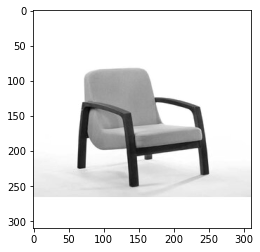

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [9]:
path = "images/wayfair/chair"
for img in os.listdir(path):  # iterate over each image per dogs and cats
     
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
    print('this',img)
    plt.imshow(img_array, cmap='gray')  # graph it
    plt.show()  # display!
    print(img_array)

    break  # we just want one for now so break


In [24]:
def create_training_data(path, IMG_SIZE):
    training_data= []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append((img, new_array/255))
        except:
            pass
        
    return training_data

In [25]:
path = "images/wayfair/chair"
training_data = create_training_data(path, 28)

In [29]:
print(len(training_data), training_data[0][1].shape)

8700 (28, 28)


In [35]:
IMG_SIZE = 28

X = []
y = []

for name,features in training_data:
    X.append(features)
    y.append(name)


#print(X[1].reshape(-1, IMG_SIZE, IMG_SIZE, 1), X[1].shape)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # make the last number 3 if you want to make COLOR images
X[0].shape

(28, 28, 1)

In [36]:
X.shape

(8700, 28, 28, 1)

In [3]:
epochs = 20
batch_size = 300
image_dimension = 28

In [44]:
model = tf.keras.models.Sequential()

model.add(Dense(128,  activation='relu', input_shape=(28,28,1)))
model.add(Dense(64,  activation='relu'))
model.add(Dense(2,    activation='linear', name="bottleneck"))
model.add(Dense(64,  activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(784,  activation='linear'))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 28, 28, 128)       256       
_________________________________________________________________
dense_11 (Dense)             (None, 28, 28, 64)        8256      
_________________________________________________________________
bottleneck (Dense)           (None, 28, 28, 2)         130       
_________________________________________________________________
dense_12 (Dense)             (None, 28, 28, 64)        192       
_________________________________________________________________
dense_13 (Dense)             (None, 28, 28, 128)       8320      
_________________________________________________________________
dense_14 (Dense)             (None, 28, 28, 784)       101136    
Total params: 118,290
Trainable params: 118,290
Non-trainable params: 0
________________________________________________

In [49]:
tf.config.run_functions_eagerly(True)

In [50]:
history = model.fit(X.astype(float), X.astype(float),
                     batch_size=300,
                     epochs=20)

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 135s 5s/step - loss: 0.3965
Epoch 2/20
29/29 [==============================] - 140s 5s/step - loss: 0.0307
Epoch 3/20
29/29 [==============================] - 146s 5s/step - loss: 0.0111
Epoch 4/20
29/29 [==============================] - 147s 5s/step - loss: 0.0049
Epoch 5/20
29/29 [==============================] - 130s 4s/step - loss: 0.0013
Epoch 6/20
29/29 [==============================] - 134s 5s/step - loss: 6.9188e-05
Epoch 7/20
29/29 [==============================] - 152s 5s/step - loss: 1.0788e-05
Epoch 8/20
29/29 [==============================] - 132s 5s/step - loss: 7.0515e-06
Epoch 9/20
29/29 [==============================] - 136s 5s/step - loss: 5.2619e-06
Epoch 10/20
29/29 [==============================] - 122s 4s/step - loss: 3.9300e-06
Epoch 11/20
29/29 [==============================] - 127s 4s/step - loss: 2.8253e-06
Epoch 12/20
29/29 [==============================] - 125s 4s/step - loss: 1.9508e-06
Epoch 13/

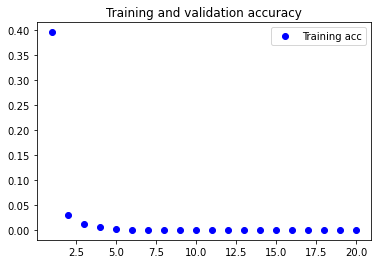

<Figure size 432x288 with 0 Axes>

In [54]:
# Plot accuracy and loss for training and validation sets

loss = history.history['loss']


epochs = range(1,21)

plt.plot(epochs, loss, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


plt.show()

In [55]:
# Save model
model.save('./model/autoencoder.h5')